<a href="https://colab.research.google.com/github/Abdallah-Ali247/data/blob/main/Data_Visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import liberaries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Dataset

In [23]:
df = pd.read_csv('/content/ramen-ratings.csv')

In [24]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [25]:
df.shape

(2580, 7)

In [26]:
df.index

RangeIndex(start=0, stop=2580, step=1)

In [27]:
df.columns

Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')

In [28]:
df.rename(columns={'Review #':'Index','Top Ten':'Top_Ten'},inplace=True)
df

,Index,Brand,Variety,Style,Country,Stars,Top_Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


### Data Exploration
 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Index    2580 non-null   int64 
 1   Brand    2580 non-null   object
 2   Variety  2580 non-null   object
 3   Style    2578 non-null   object
 4   Country  2580 non-null   object
 5   Stars    2580 non-null   object
 6   Top_Ten  41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


**now we conclude that** 

1. Style col have null
2. Top_Ten have much null values
3. Stars & Top_Ten col are Object


In [30]:
df.describe()

,Index
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


In [31]:
df.nunique()

Index      2580
Brand       355
Variety    2413
Style         7
Country      38
Stars        51
Top_Ten      38
dtype: int64

In [32]:
df.isnull().sum() 
#df.isna().sum()

Index         0
Brand         0
Variety       0
Style         2
Country       0
Stars         0
Top_Ten    2539
dtype: int64

In [33]:
df.isnull().mean()*100

Index       0.000000
Brand       0.000000
Variety     0.000000
Style       0.077519
Country     0.000000
Stars       0.000000
Top_Ten    98.410853
dtype: float64

###### Top_Ten have a large null values

###  Data Preprocessing

1.  Remove the NaN values from the datas
2.  Dropping duplicates.

In [34]:
df['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', 'Unrated', '1.5', '3.25', '2', '0', '3',
       '0.5', '4.00', '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3',
       '4.0', '3.00', '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1',
       '0.9', '3.1', '4.125', '3.125', '2.125', '2.9', '0.1', '2.8',
       '3.7', '3.4', '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

 
*   note that Stars col have 'Unrated' values
*   it's type is Object , we need to convert it  to float




#### work on Stars column

In [35]:
df['Stars'].value_counts(dropna=False)['Unrated']

3

In [36]:
# display 'Unrated' before drop
df[df['Stars']=='Unrated']

,Index,Brand,Variety,Style,Country,Stars,Top_Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated,NaN
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated,NaN
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated,NaN


In [37]:
#remove Rows contains 'Urated' values in Stars column 
df = df[df.Stars != "Unrated" ] 

In [38]:
df['Stars'].unique()

array(['3.75', '1', '2.25', '2.75', '4.75', '4', '0.25', '2.5', '5',
       '4.25', '4.5', '3.5', '1.5', '3.25', '2', '0', '3', '0.5', '4.00',
       '5.0', '3.50', '3.8', '4.3', '2.3', '5.00', '3.3', '4.0', '3.00',
       '1.75', '3.0', '4.50', '0.75', '1.25', '1.1', '2.1', '0.9', '3.1',
       '4.125', '3.125', '2.125', '2.9', '0.1', '2.8', '3.7', '3.4',
       '3.6', '2.85', '3.2', '3.65', '1.8'], dtype=object)

In [39]:
df['Stars']=df['Stars'].astype(float)

<ipython-input-39-be48fcd90d19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stars']=df['Stars'].astype(float)


In [40]:
df['Stars']

0       3.75
1       1.00
2       2.25
3       2.75
4       3.75
        ... 
2575    3.50
2576    1.00
2577    2.00
2578    2.00
2579    0.50
Name: Stars, Length: 2577, dtype: float64

#### work on 'Top_ten' Column

In [42]:
df['Top_Ten'].unique()

array([nan, '2016 #10', '2016 #1', '2016 #8', '2016 #5', '2016 #9',
       '2016 #7', '2015 #10', '2015 #7', '2015 #4', '2015 #9', '2015 #6',
       '2015 #1', '2013 #10', '2015 #8', '2014 #7', '2014 #4', '2014 #9',
       '2014 #10', '2014 #8', '2014 #5', '2014 #6', '2014 #1', '2013 #1',
       '2013 #2', '2013 #4', '\n', '2013 #9', '2013 #3', '2012 #10',
       '2012 #7', '2012 #5', '2012 #3', '2012 #6', '2012 #9', '2012 #1',
       '2012 #2', '2013 #6', '2012 #4'], dtype=object)

In [43]:
# replace '\n' value with nan
df['Top_Ten']=df['Top_Ten'].replace('\n',np.nan)

<ipython-input-43-d9af8296695c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Top_Ten']=df['Top_Ten'].replace('\n',np.nan)


In [44]:
df['Top_Ten'].unique()

array([nan, '2016 #10', '2016 #1', '2016 #8', '2016 #5', '2016 #9',
       '2016 #7', '2015 #10', '2015 #7', '2015 #4', '2015 #9', '2015 #6',
       '2015 #1', '2013 #10', '2015 #8', '2014 #7', '2014 #4', '2014 #9',
       '2014 #10', '2014 #8', '2014 #5', '2014 #6', '2014 #1', '2013 #1',
       '2013 #2', '2013 #4', '2013 #9', '2013 #3', '2012 #10', '2012 #7',
       '2012 #5', '2012 #3', '2012 #6', '2012 #9', '2012 #1', '2012 #2',
       '2013 #6', '2012 #4'], dtype=object)

In [45]:
# split 'Top_Ten' column to 'Year' and 'Top_Ten' columns

df['Year']=df['Top_Ten'].apply(lambda x: str(x).split(' #')[0] if len(str(x).split(' #'))>1 else x)
df['Top_Ten']=df['Top_Ten'].apply(lambda x: str(x).split(' #')[1] if len(str(x).split(' #'))>1 else x)

<ipython-input-45-1fe529ad91ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year']=df['Top_Ten'].apply(lambda x: str(x).split(' #')[0] if len(str(x).split(' #'))>1 else x)
<ipython-input-45-1fe529ad91ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Top_Ten']=df['Top_Ten'].apply(lambda x: str(x).split(' #')[1] if len(str(x).split(' #'))>1 else x)


In [46]:
#sample after split
df['Year'][616]

'2016'

In [47]:
#sample after splitting
df['Top_Ten'][616]

'10'

In [48]:
df.isna().sum()

Index         0
Brand         0
Variety       0
Style         2
Country       0
Stars         0
Top_Ten    2540
Year       2540
dtype: int64

In [49]:
df.fillna({'Top_Ten':0,'Year':0},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [50]:
df['Top_Ten'] = df['Top_Ten'].astype(int)
df['Year'] = df['Year'].astype(int)

<ipython-input-50-cf873918c2cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Top_Ten'] = df['Top_Ten'].astype(int)
<ipython-input-50-cf873918c2cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)


In [51]:
df[df['Top_Ten']>0][:3]

,Index,Brand,Variety,Style,Country,Stars,Top_Ten,Year
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.0,10,2016
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.0,1,2016
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.0,8,2016


In [52]:
df[df['Year']>0][:3]

,Index,Brand,Variety,Style,Country,Stars,Top_Ten,Year
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.0,10,2016
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.0,1,2016
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.0,8,2016


In [53]:
df['Top_Ten'].unique()

array([ 0, 10,  1,  8,  5,  9,  7,  4,  6,  2,  3])

In [54]:
df['Year'].unique()

array([   0, 2016, 2015, 2013, 2014, 2012])

#### work on Style Column

In [55]:
# drop nan from Style
df.dropna(subset=['Style'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


### Data Exploration after processing

In [56]:
df.isna().sum()

Index      0
Brand      0
Variety    0
Style      0
Country    0
Stars      0
Top_Ten    0
Year       0
dtype: int64

In [57]:
df.duplicated().sum()

0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2579
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Index    2575 non-null   int64  
 1   Brand    2575 non-null   object 
 2   Variety  2575 non-null   object 
 3   Style    2575 non-null   object 
 4   Country  2575 non-null   object 
 5   Stars    2575 non-null   float64
 6   Top_Ten  2575 non-null   int64  
 7   Year     2575 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 181.1+ KB


In [59]:
df.describe()

,Index,Stars,Top_Ten,Year
count,2575.000000,2575.000000,2575.000000,2575.000000
mean,1290.225631,3.654893,0.084272,28.936699
std,744.318327,1.015641,0.785631,239.705714
min,1.000000,0.000000,0.000000,0.000000
25%,646.500000,3.250000,0.000000,0.000000
50%,1290.000000,3.750000,0.000000,0.000000
75%,1934.500000,4.250000,0.000000,0.000000
max,2580.000000,5.000000,10.000000,2016.000000


In [60]:
df.describe(include=["O"])

,Brand,Variety,Style,Country
count,2575,2575,2575,2575
unique,355,2408,7,38
top,Nissin,Beef,Pack,Japan
freq,381,7,1528,352


### Data Visualization 

In [61]:
# make a copy from df with only Reall values
df2=df.copy()
df2=df2.replace(0,np.nan)
df2.dropna(inplace=True)
df2

,Index,Brand,Variety,Style,Country,Stars,Top_Ten,Year
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.00,10.0,2016.0
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.00,1.0,2016.0
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.00,8.0,2016.0
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.00,5.0,2016.0
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.00,9.0,2016.0
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.00,7.0,2016.0
942,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5.00,10.0,2015.0
963,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5.00,7.0,2015.0
995,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5.00,4.0,2015.0
1059,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5.00,9.0,2015.0


Text(0.5, 1.0, 'Brand Raiting')

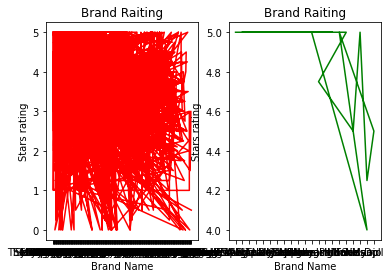

In [62]:
#df data
plt.subplot(1,2,1)
plt.plot(df['Brand'],df['Stars'],'r')
plt.xlabel('Brand Name')
plt.ylabel('Stars rating')
plt.title('Brand Raiting')
#df2 data
plt.subplot(1,2,2)
plt.plot(df2['Brand'],df2['Stars'],'g')
plt.xlabel('Brand Name')
plt.ylabel('Stars rating')
plt.title('Brand Raiting')

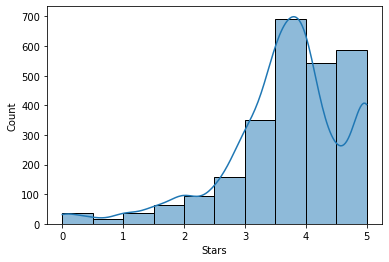

In [63]:
sns.histplot(df['Stars'],bins=10,kde=True)

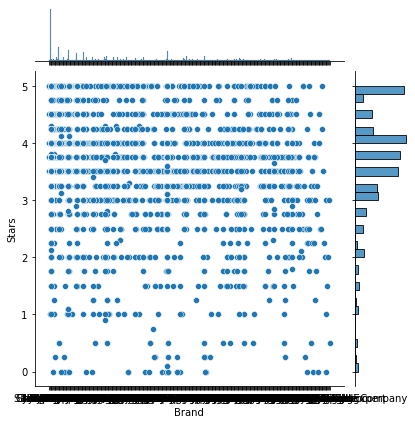

In [64]:
sns.jointplot(x='Brand',y='Stars',data=df,kind='scatter')

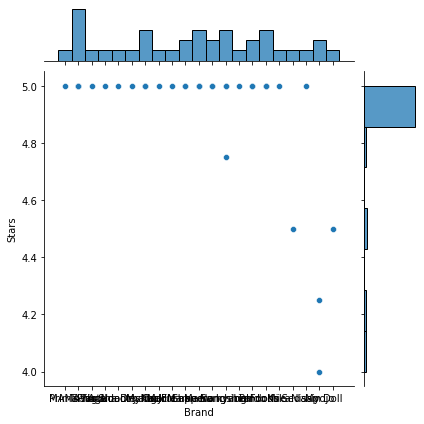

In [65]:
sns.jointplot(x='Brand',y='Stars',data=df2,kind='scatter')

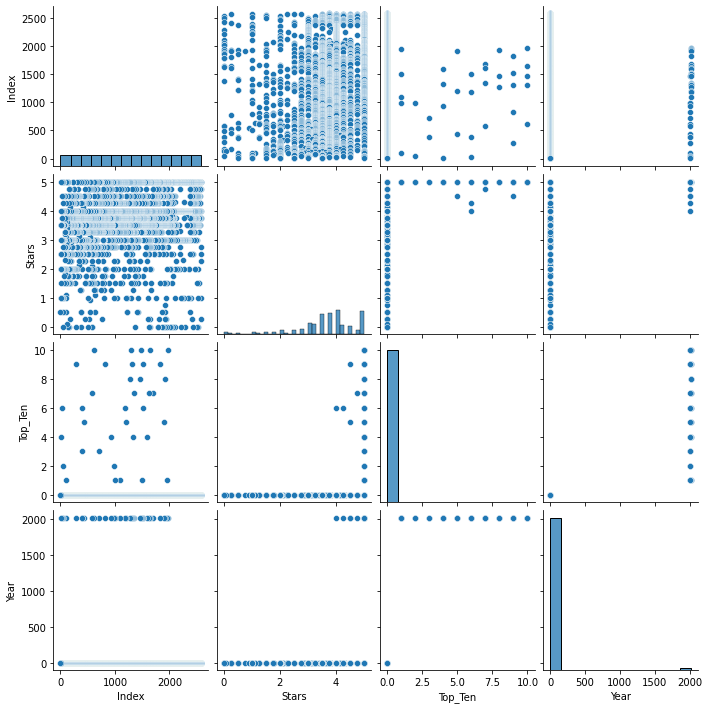

In [487]:
sns.pairplot(df)

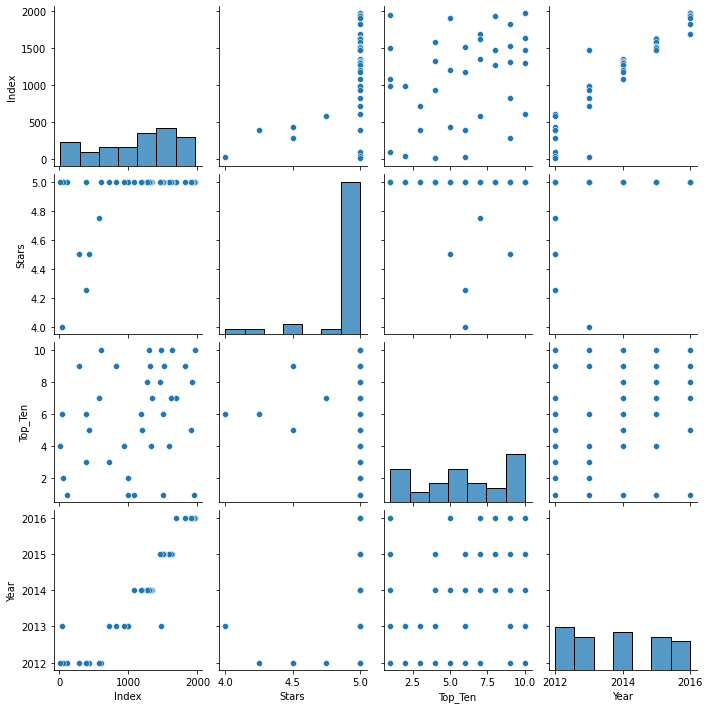

In [489]:
sns.pairplot(df2)

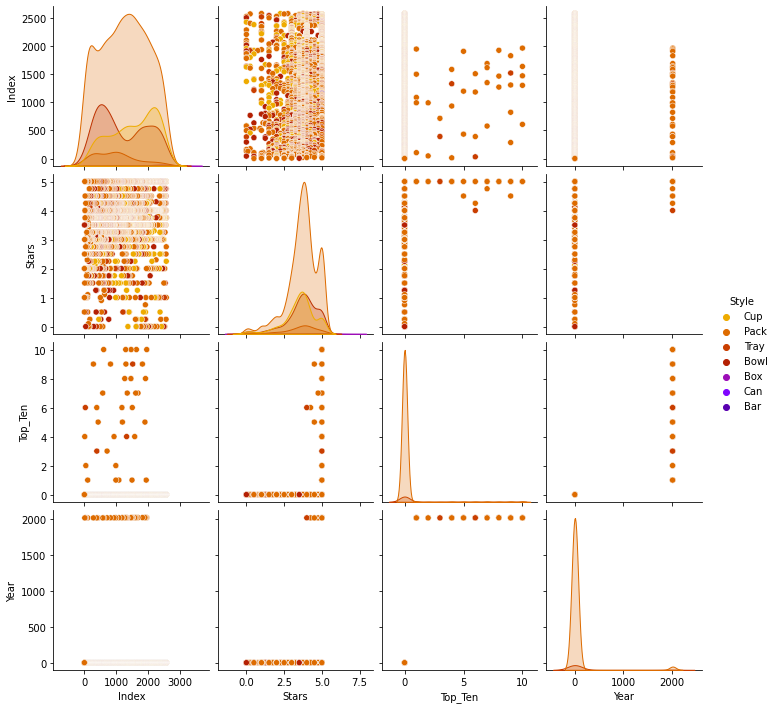

In [89]:
sns.pairplot(df,hue='Style',palette='gnuplot_r')

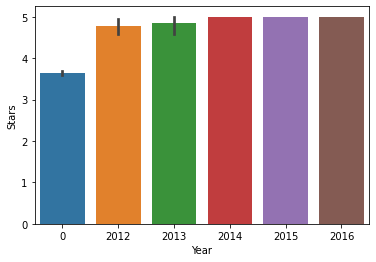

In [90]:
sns.barplot(x='Year',y='Stars',data=df)

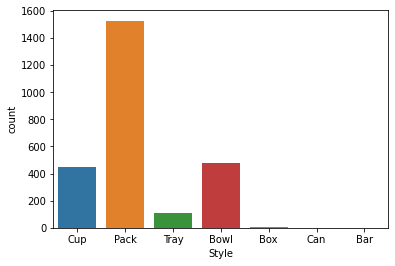

In [67]:
sns.countplot(x='Style',data=df)

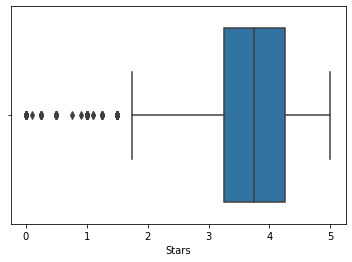

In [69]:
sns.boxplot(x='Stars', data=df)

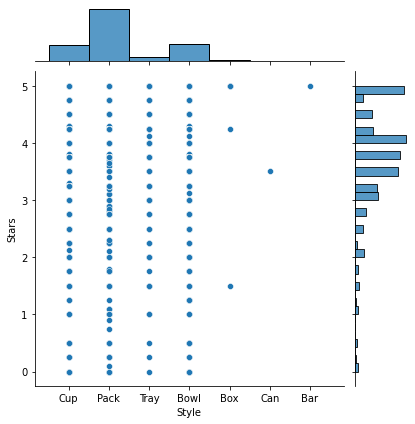

In [87]:
sns.jointplot(x='Style',y="Stars",data=df,kind='scatter')

Text(0, 0.5, 'Brand')

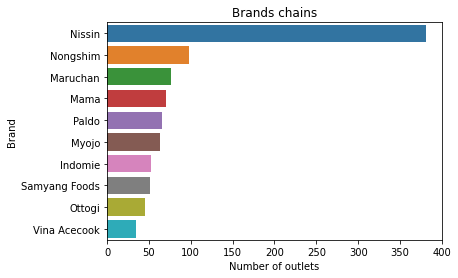

In [72]:
chains=df['Brand'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index)
plt.title("Brands chains")
plt.xlabel("Number of outlets")
plt.ylabel("Brand")

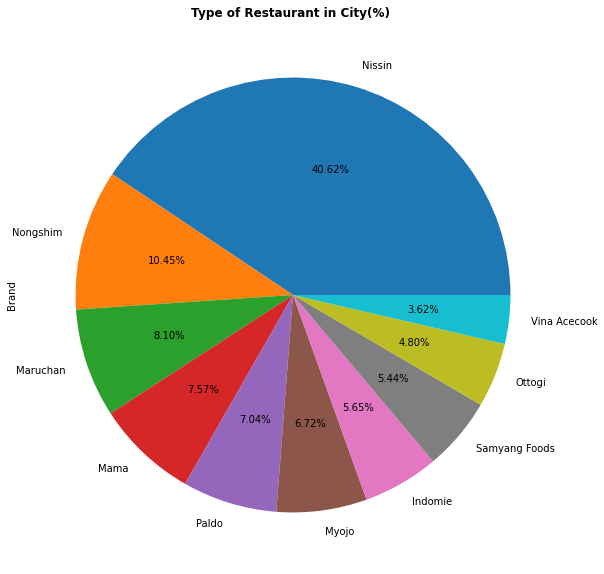

In [77]:
plt.figure(figsize=(15,10))
ax=df["Brand"].value_counts()[:10].plot(kind='pie',autopct='%1.2f%%')
plt.title('Type of Brands in City(%) ', weight='bold')
plt.show()

In [78]:
df.corr()

,Index,Stars,Top_Ten,Year
Index,1.000000,0.243351,-0.014271,-0.029776
Stars,0.243351,1.000000,0.132745,0.150306
Top_Ten,-0.014271,0.132745,1.000000,0.888638
Year,-0.029776,0.150306,0.888638,1.000000


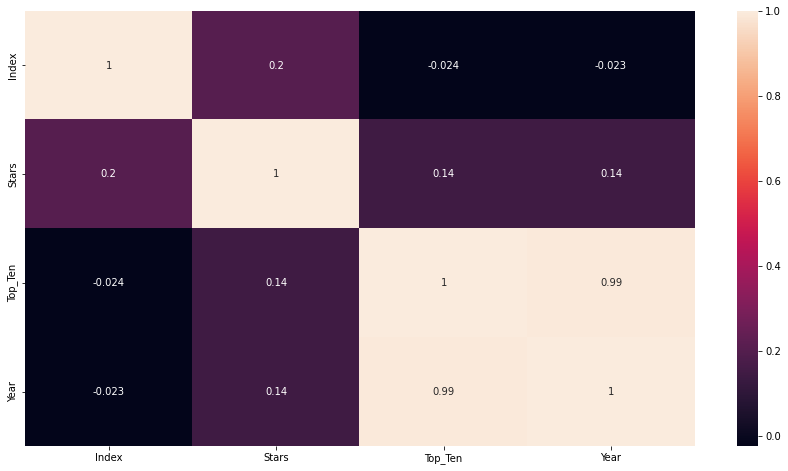

In [79]:
#Get Correlation between different variables
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)